PREPROCESSING


In [3]:
import pandas as pd
import re


In [4]:
train_df = pd.read_csv("twitter_training.csv", header=None, names=['tweet_id', 'tweet_topic', 'sentiment', 'tweet_content'])
validation_df = pd.read_csv("twitter_validation.csv", header=None, names=['tweet_id', 'tweet_topic', 'sentiment', 'tweet_content'])

In [5]:
def preprocess_text(text):
    if isinstance(text, str):  
        text = text.lower()
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ''  

In [6]:
train_df['clean_tweet'] = train_df['tweet_content'].apply(preprocess_text)
validation_df['clean_tweet'] = validation_df['tweet_content'].apply(preprocess_text)

In [7]:
print("Training Set:")
print(train_df.head())


Training Set:
   tweet_id  tweet_topic sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       tweet_content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                         clean_tweet  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands and i will murder yo...  


In [8]:
print(validation_df.head())

   tweet_id tweet_topic   sentiment  \
0      3364    Facebook  Irrelevant   
1       352      Amazon     Neutral   
2      8312   Microsoft    Negative   
3      4371       CS-GO    Negative   
4      4433      Google     Neutral   

                                       tweet_content  \
0  I mentioned on Facebook that I was struggling ...   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  @Microsoft Why do I pay for WORD when it funct...   
3  CSGO matchmaking is so full of closet hacking,...   
4  Now the President is slapping Americans in the...   

                                         clean_tweet  
0  i mentioned on facebook that i was struggling ...  
1  bbc news amazon boss jeff bezos rejects claims...  
2  microsoft why do i pay for word when it functi...  
3  csgo matchmaking is so full of closet hacking ...  
4  now the president is slapping americans in the...  


In [9]:
print("Validation Set:")
print(validation_df.head())

Validation Set:
   tweet_id tweet_topic   sentiment  \
0      3364    Facebook  Irrelevant   
1       352      Amazon     Neutral   
2      8312   Microsoft    Negative   
3      4371       CS-GO    Negative   
4      4433      Google     Neutral   

                                       tweet_content  \
0  I mentioned on Facebook that I was struggling ...   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  @Microsoft Why do I pay for WORD when it funct...   
3  CSGO matchmaking is so full of closet hacking,...   
4  Now the President is slapping Americans in the...   

                                         clean_tweet  
0  i mentioned on facebook that i was struggling ...  
1  bbc news amazon boss jeff bezos rejects claims...  
2  microsoft why do i pay for word when it functi...  
3  csgo matchmaking is so full of closet hacking ...  
4  now the president is slapping americans in the...  


In [10]:
print(train_df.columns)


Index(['tweet_id', 'tweet_topic', 'sentiment', 'tweet_content', 'clean_tweet'], dtype='object')


EDA



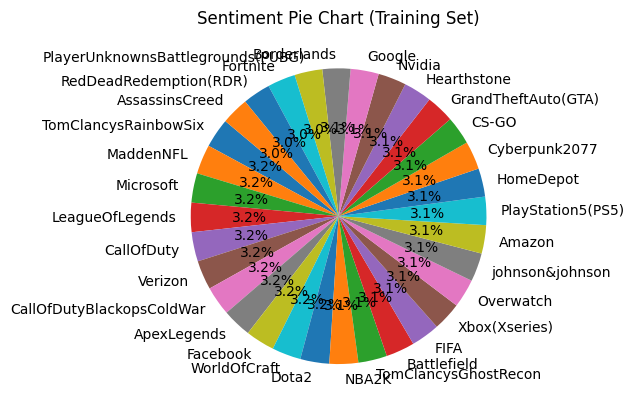

In [12]:
import matplotlib.pyplot as plt

class_distribution_validation = train_df['tweet_topic'].value_counts()
plt.pie(class_distribution_validation, labels=class_distribution_validation.index, startangle=140, autopct='%1.1f%%')
plt.title('Sentiment Pie Chart (Training Set)')
plt.show()


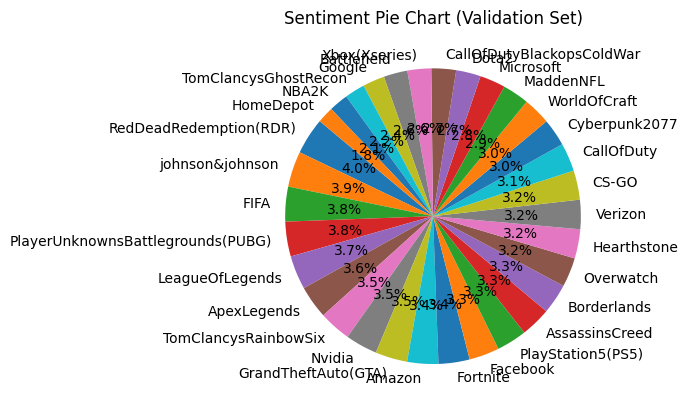

In [13]:
import matplotlib.pyplot as plt

class_distribution_validation = validation_df['tweet_topic'].value_counts()
plt.pie(class_distribution_validation, labels=class_distribution_validation.index, startangle=140, autopct='%1.1f%%')
plt.title('Sentiment Pie Chart (Validation Set)')
plt.show()


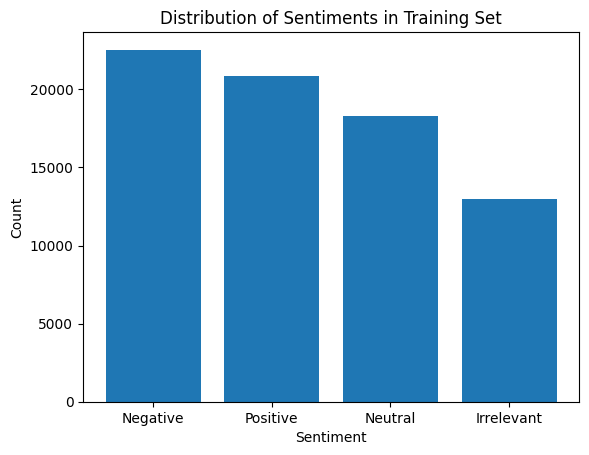

In [14]:
import matplotlib.pyplot as plt

class_distribution_train = train_df['sentiment'].value_counts()

plt.bar(class_distribution_train.index, class_distribution_train.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Training Set')
plt.show()


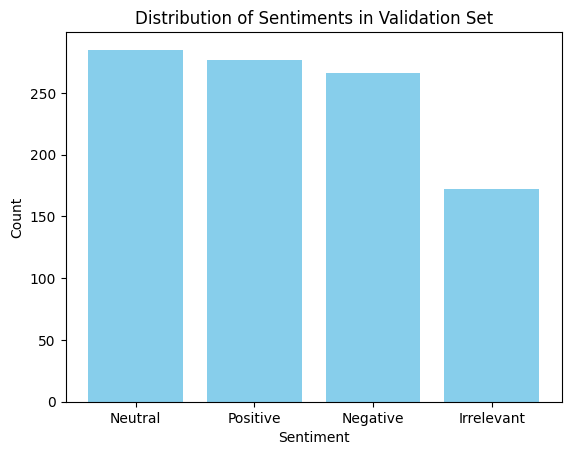

In [15]:
import matplotlib.pyplot as plt

class_distribution_validation = validation_df['sentiment'].value_counts()

plt.bar(class_distribution_validation.index, class_distribution_validation.values, color='skyblue')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Validation Set')

plt.show()


TRAINING MODEL



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()

logistic_regression_classifier = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', logistic_regression_classifier)
])

pipeline.fit(train_df['clean_tweet'], train_df['sentiment'])

predicted_sentiments = pipeline.predict(validation_df['clean_tweet'])

report = classification_report(validation_df['sentiment'], predicted_sentiments)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.88      0.90       172
    Negative       0.88      0.94      0.91       266
     Neutral       0.96      0.88      0.92       285
    Positive       0.90      0.94      0.92       277

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000



VALIDATE MODEL


In [19]:
new_tweet = "I hate this game"
predicted_sentiment = pipeline.predict([new_tweet])
predicted_sentiment_label = predicted_sentiment[0] 
print("Predicted Sentiment:", predicted_sentiment_label)


Predicted Sentiment: Negative


In [20]:
new_tweet = "I like this game"
predicted_sentiment = pipeline.predict([new_tweet])
predicted_sentiment_label = predicted_sentiment[0] 
print("Predicted Sentiment:", predicted_sentiment_label)


Predicted Sentiment: Positive


In [21]:
import joblib

joblib.dump(pipeline, 'sentiment_analysis_model.joblib')


['sentiment_analysis_model.joblib']